In [24]:
import numpy as np
import scanpy as sc
import anndata
import scvi
from scib_metrics.benchmark import Benchmarker
import torch
import scib_metrics
from lightning.pytorch.callbacks import ModelCheckpoint
import copy
%matplotlib inline
import sys
sys.path.append('..')
from functions import *
from SCVIModelCheckpoint import SCVIModelCheckpoint 
import seaborn as sns

In [20]:
adata = anndata.read_h5ad(filename="../data/adataLung4.h5ad")

In [21]:
betas = [0, 1, 2, 4, 6, 8, 10, 15]

In [22]:
adataMG, keysMG = betasTraining(adata,"mixofgaus", betas)
bmMG = runBenchmark(adataMG, keysMG, nmi_ari_cluster_labels_leiden=True, kbet_per_label=True)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [13:45<00:00,  1.87s/it, v_num=1, train_loss_step=847, train_loss_epoch=857]    

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [13:45<00:00,  2.06s/it, v_num=1, train_loss_step=847, train_loss_epoch=857]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [15:37<00:00,  2.40s/it, v_num=1, train_loss_step=873, train_loss_epoch=874]    

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [15:37<00:00,  2.34s/it, v_num=1, train_loss_step=873, train_loss_epoch=874]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [13:55<00:00,  2.02s/it, v_num=1, train_loss_step=885, train_loss_epoch=884]    

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [13:55<00:00,  2.09s/it, v_num=1, train_loss_step=885, train_loss_epoch=884]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [13:06<00:00,  1.92s/it, v_num=1, train_loss_step=918, train_loss_epoch=896]    

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [13:06<00:00,  1.97s/it, v_num=1, train_loss_step=918, train_loss_epoch=896]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [13:15<00:00,  2.01s/it, v_num=1, train_loss_step=861, train_loss_epoch=904]    

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [13:15<00:00,  1.99s/it, v_num=1, train_loss_step=861, train_loss_epoch=904]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [12:03<00:00,  1.78s/it, v_num=1, train_loss_step=930, train_loss_epoch=911]    

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [12:03<00:00,  1.81s/it, v_num=1, train_loss_step=930, train_loss_epoch=911]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [12:07<00:00,  1.76s/it, v_num=1, train_loss_step=1.01e+3, train_loss_epoch=916]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [12:07<00:00,  1.82s/it, v_num=1, train_loss_step=1.01e+3, train_loss_epoch=916]


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [12:42<00:00,  1.96s/it, v_num=1, train_loss_step=946, train_loss_epoch=928]    

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [12:42<00:00,  1.91s/it, v_num=1, train_loss_step=946, train_loss_epoch=928]


Embeddings: 100%|██████████| 8/8 [03:29<00:00, 26.17s/it]


In [23]:
results = bmMG.get_results(min_max_scale=False)
results.to_csv("results/kl_scaling_MG2.csv")

Plot bio-conservation vs batch-correction

In [25]:
results = results.drop("Metric Type")
results["beta"] = betas

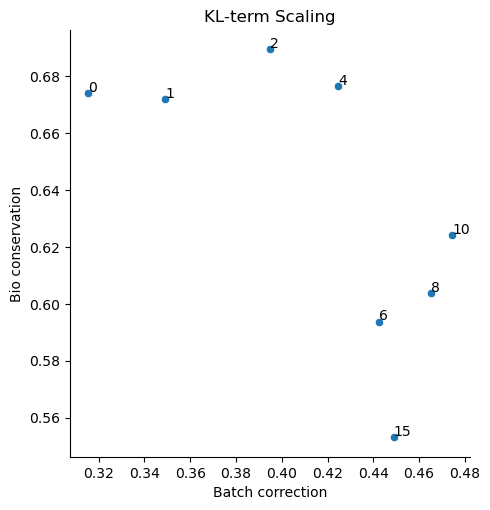

In [27]:
plot = sns.relplot(data = results, x="Batch correction", y="Bio conservation")
for i in range(results.shape[0]):
    plt.annotate(results["beta"][i],(results["Batch correction"][i],results["Bio conservation"][i]+0.0005))
plot.set(title="KL-term Scaling")
plot.savefig("plots/kl_scaling")